In [1]:
%matplotlib inline

# Travail Pratique 2 - Modèle de Prediction de la qualite d'un vin

L'objectif est de modéliser la qualité d'un vin sur la base des resultats de tests physico-chimiques. Pour cela nous allons utiliser 2 approches, une par la méthode de regression lineaire et l'autre par la méthode classification

Dans ce TP, nous allons apprendre comment:

- Extraire les données à partir d'un datahub distant

- Explorer des données pour des correlation eventuelles 

- Créer d'un modèle de regression linéaire

- Evaluer les métriques de regression

- Créer d'un modèle de classification 

- Utiliser le modèle pour des prédictions sur des nouvelles données

- Evaluer les métriques de classification


### Description des données

Les données inclus un échantillon de vin rouge du nord du Portugal et publiees dans le repertoire de données de l'University of California, Irvine. 

Attributs ou variables d'entree (resultats de tests physico-chimiques):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality (varie de 0 a 10)

L'attribut "quality" est la cible que l'on veut predire

Pour avoir plus d'informations sur les données, visiter https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [2]:
# Importer les librairies neccessaires pour la traitement et l'exploration des données
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Extraire les données

Extraire les données à partir d'un datahub distant https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

La méthode pandas read_csv() est decrite a l'adresse https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

Faites attention au type de separateur utilisé.

In [3]:
# Completer le code ci-dessous
##url = '............'
##df = pd.read_csv("C:/Users/HP/Documents/LES COURS DE M2 ISOC/SEMESTRE LMD 9 (S1)/Cours Machine Learning, Deep Learning et IA/TP2_MLDL_ISOC_M2_NDACAYISABA Vestine/winequality-red.csv", sep=';')
##df.head()

url = "C:/Users/HP/Documents/LES COURS DE M2 ISOC/SEMESTRE LMD 9 (S1)/Cours Machine Learning, Deep Learning et IA/TP2_MLDL_ISOC_M2_NDACAYISABA Vestine/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head()



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
# Affichez le nombre d'instances de vins et le nombre d'attributs
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html
dimension = df.shape
print("Nombre de lignes", dimension[0])
print("Nombre d'attributs", dimension[1])

Nombre de lignes 1599
Nombre d'attributs 12


# Exploration des données pour detecter des tendances

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
df.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [7]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000



### À partir de la description des données ci-dessus, que pensez-vous déjà de l'importance de l'attribut 'density' pour prédire la qualité du vin ? Faut-il la supprimer ou garder ? Ajouter votre commentaire ici

......


In [8]:
# Pour l'instant nous n'allons pas supprimer l'attribut 'density'
# Verifiez s'il y a des colonnes avec des valeurs manquantes dans le tableau des données
# La fonction suivante compte le nombre de valeur manquantes par colonne
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

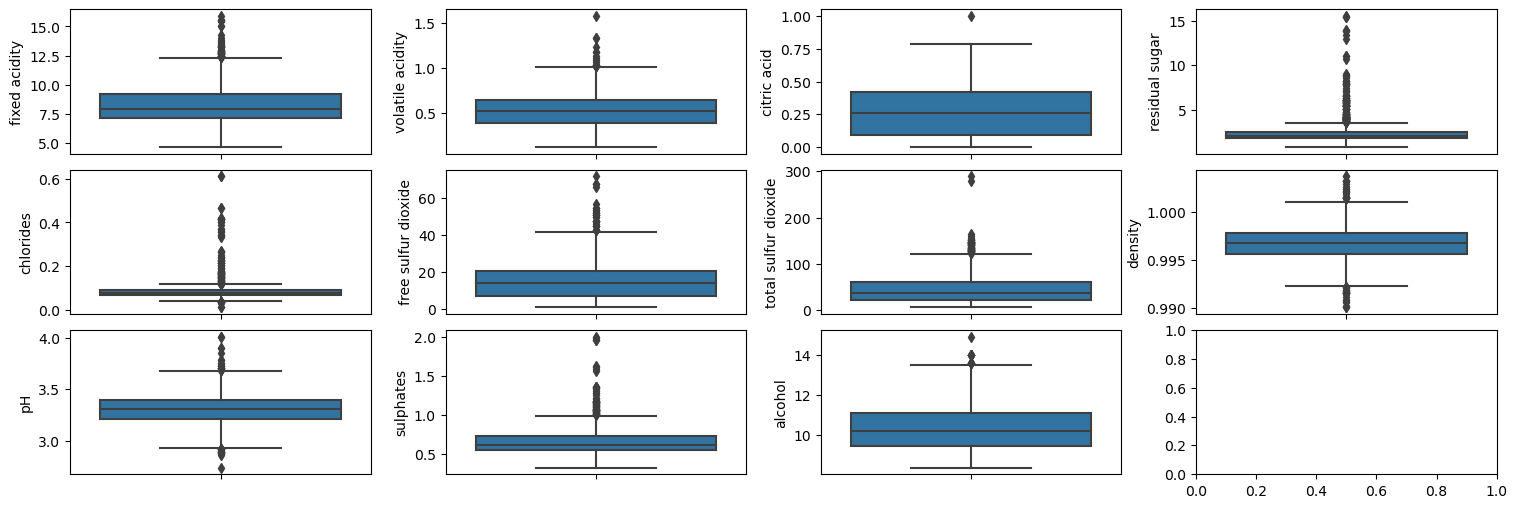

In [9]:
# Verifiez s'il y a des valeurs anormales (outliers en anlgais) dans le tableau des données avec la fonction boxplot
# Pour l'instant nous n'allons pas les supprimer 
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(15, 5))
ax = ax.flatten()
index = 0
for column in df.columns:
  if column != 'quality':
    sns.boxplot(y=column, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

### Exploration des données pour detecter des tendances

In [10]:
# completez le code ci-dessous
correlation = df.corr()
print("Tableau du degré de correlation entre les differents attributs")
correlation

Tableau du degré de correlation entre les differents attributs


fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   

                       alcohol   quality  
fixed acidity        -0.061668  0.124052  
volatile acidity     -0.202288 -0.390558  
citric acid           0.109903  0.226373  
residual sugar        0.042075  0.013732  
chlorides            -0.221141 -0.128907  
free sulfur dioxide  -0.069408 -0.050656  
total sulfur dioxide -0.205654 -0.185100  
density              -0.496180 -0.174919  
pH                    0.205633 -0.057731  
sulphates             0.093595  0.251397  
alcohol               1.000000  0.476166  
quality               0.476166  1.000000

Tableau du degré de correlation entre les differents attributs avec seaborn


<AxesSubplot:>

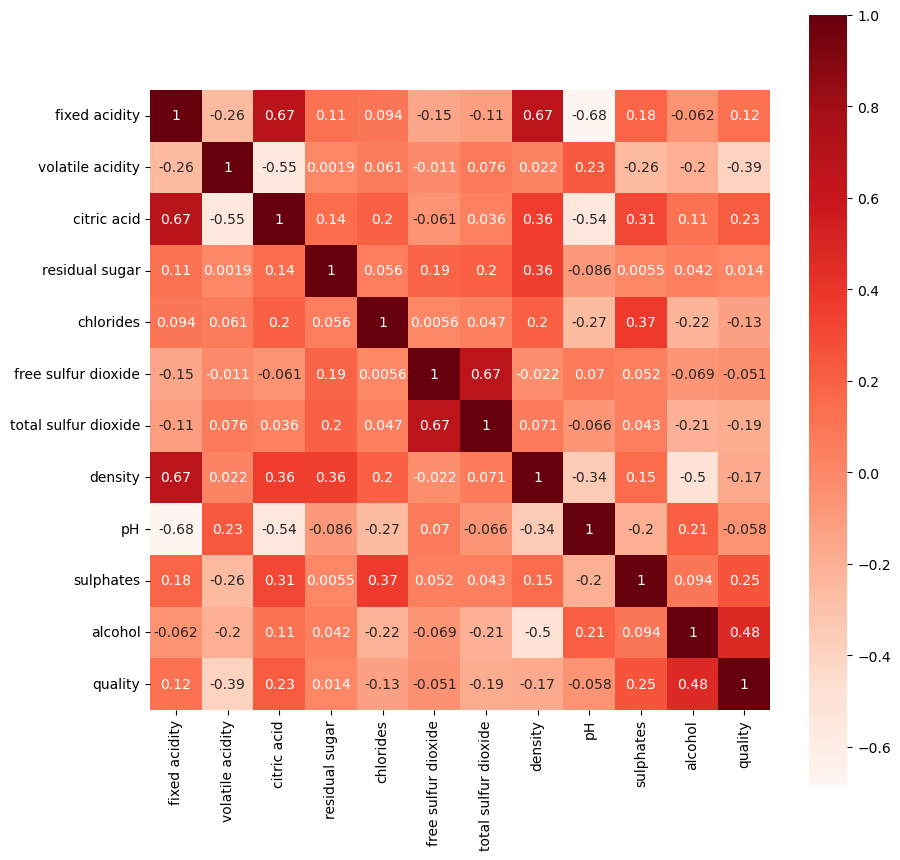

In [11]:
# On peut obtenir une meilleur visualisation avec la librairie seaborn
fig = plt.subplots(figsize=(10,10))
print("Tableau du degré de correlation entre les differents attributs avec seaborn")
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Reds')

In [12]:
# Selectionnez les données d'entrées X (les 10 premières colonnes) et les données cibles Y (la dernière colone)
# Description du selecteur DataFrame.iloc https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [13]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1:].values

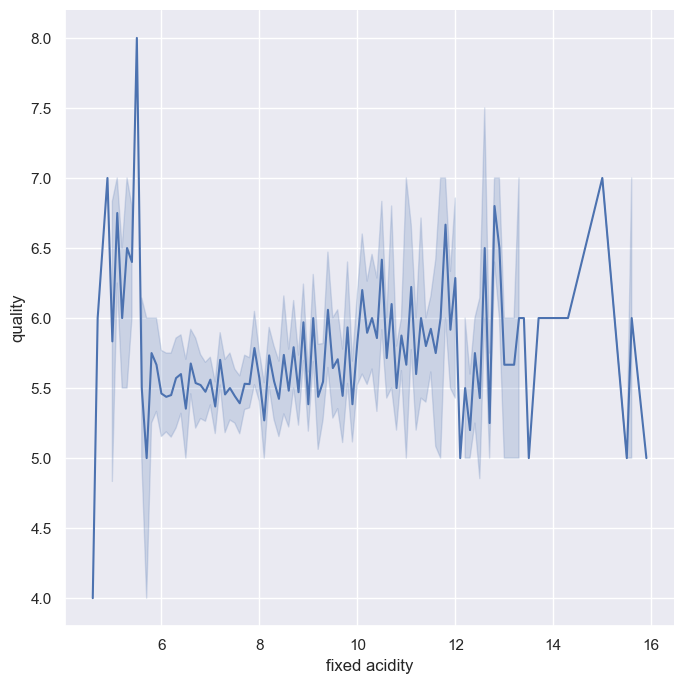

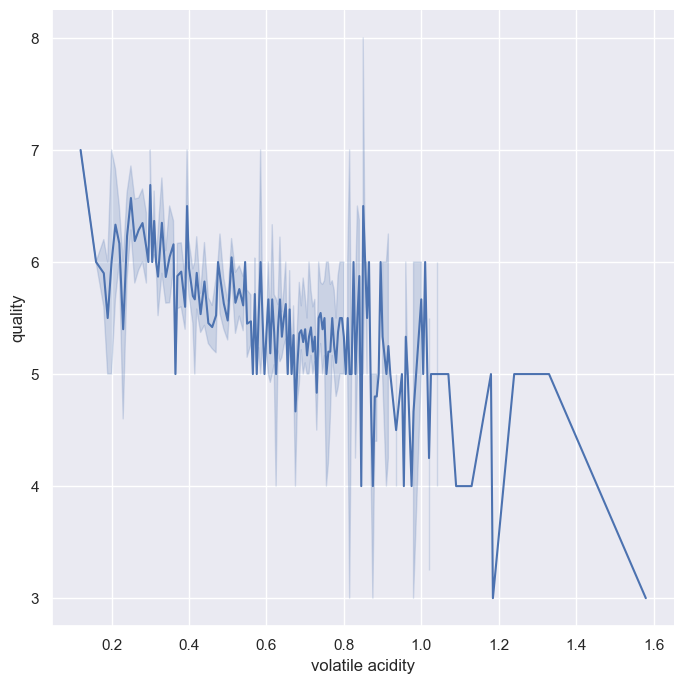

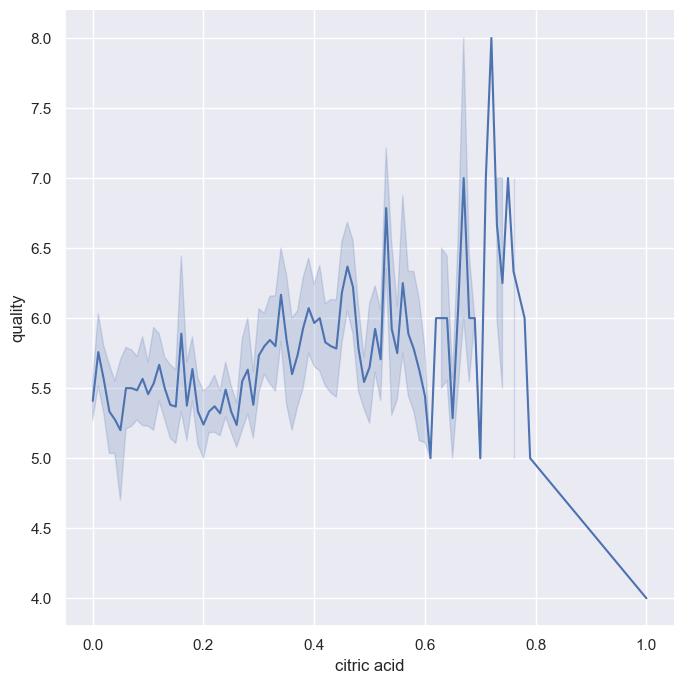

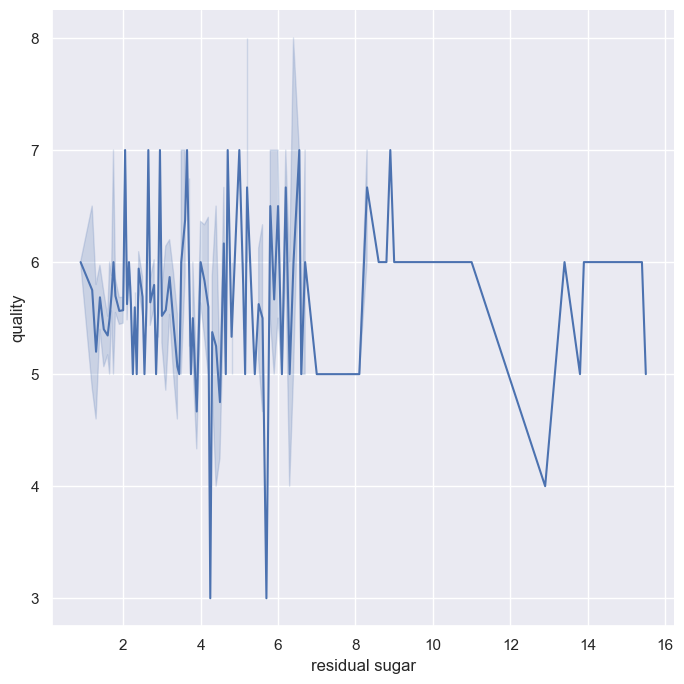

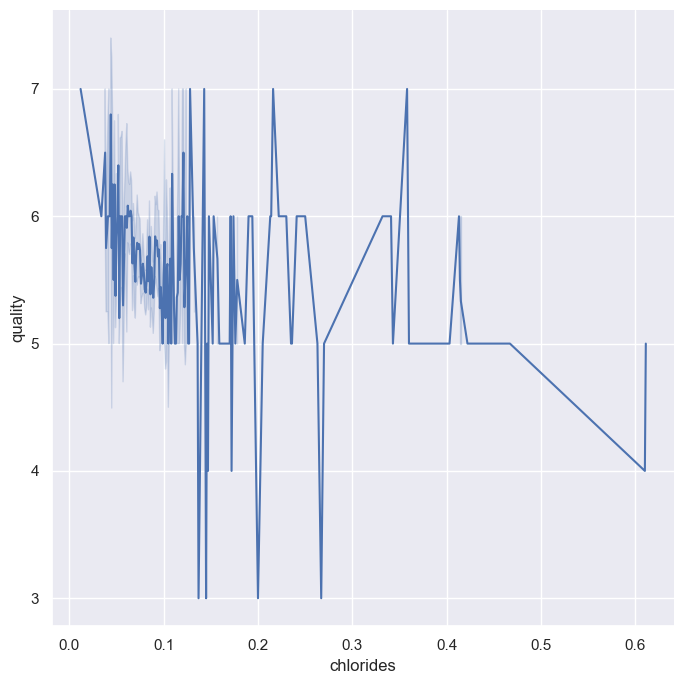

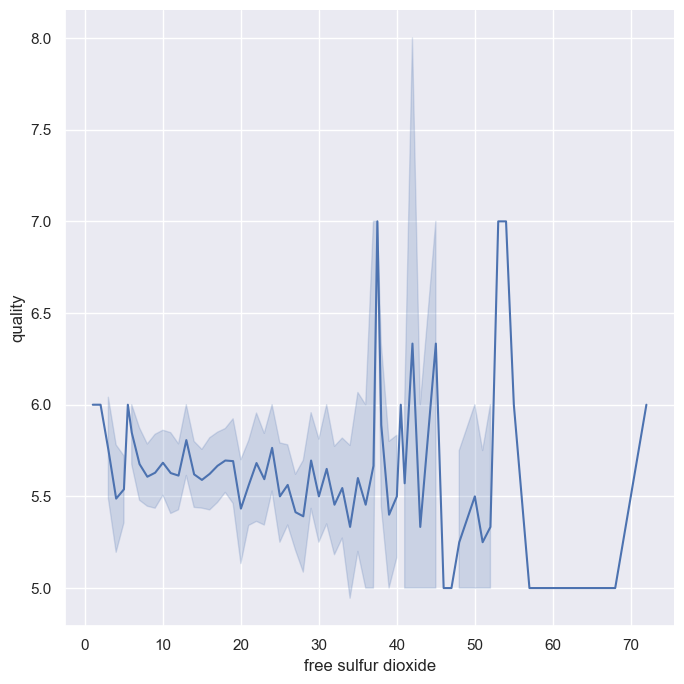

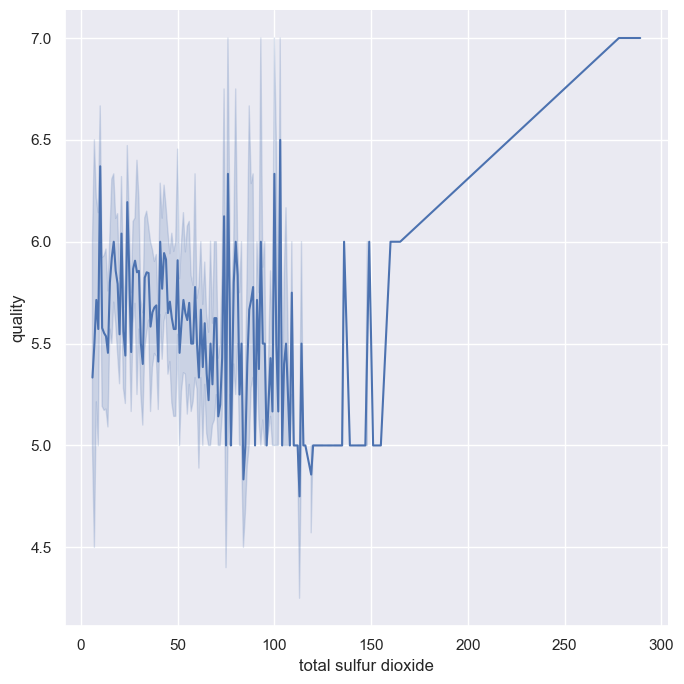

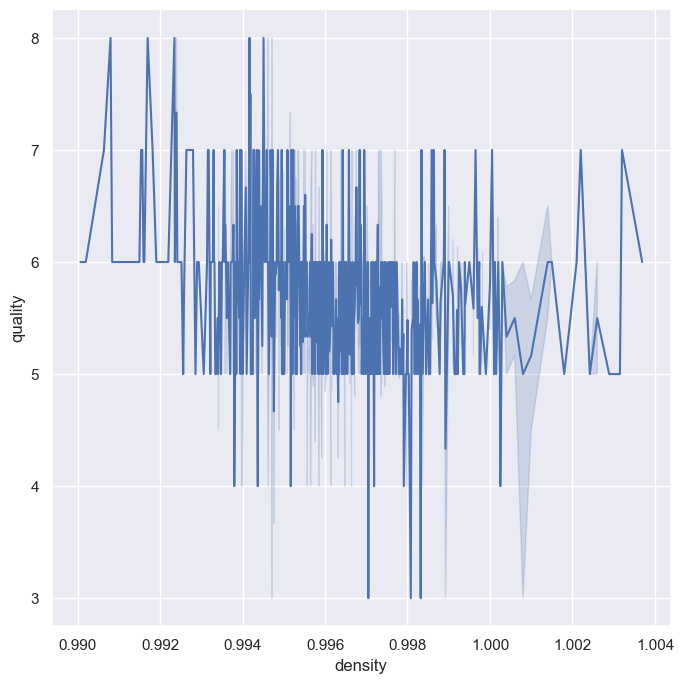

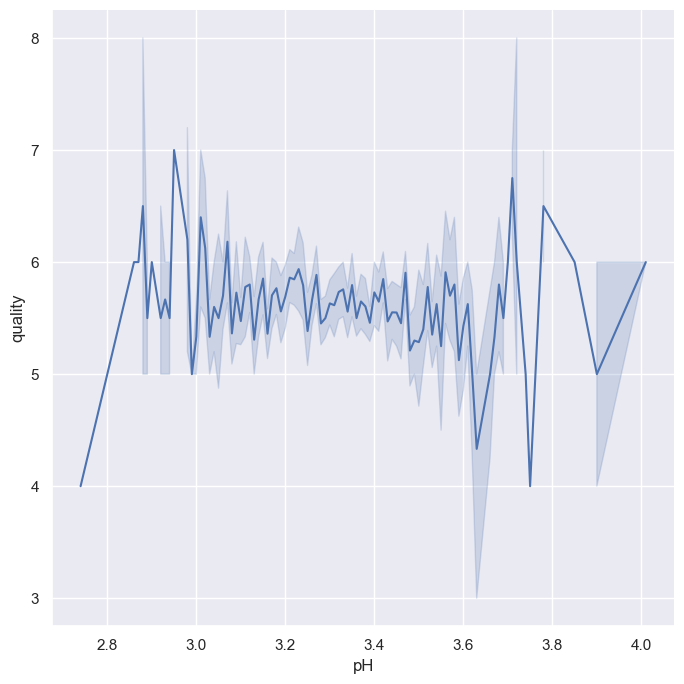

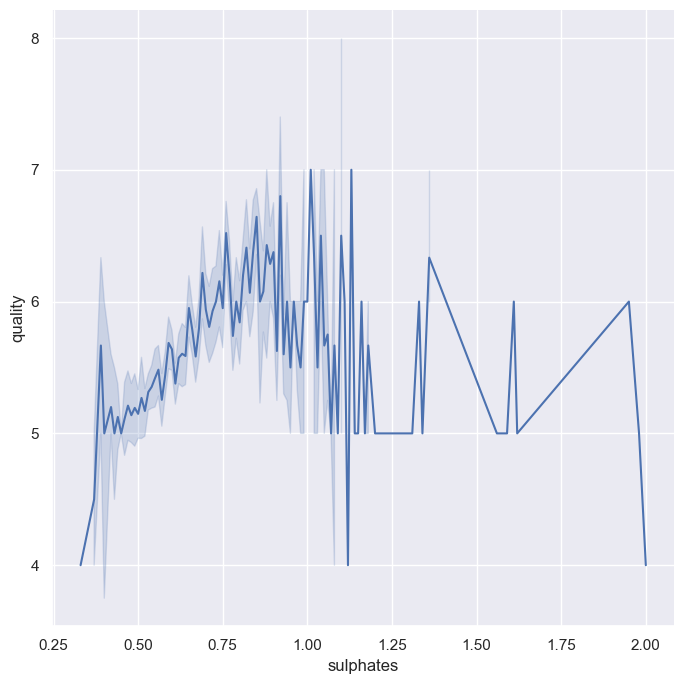

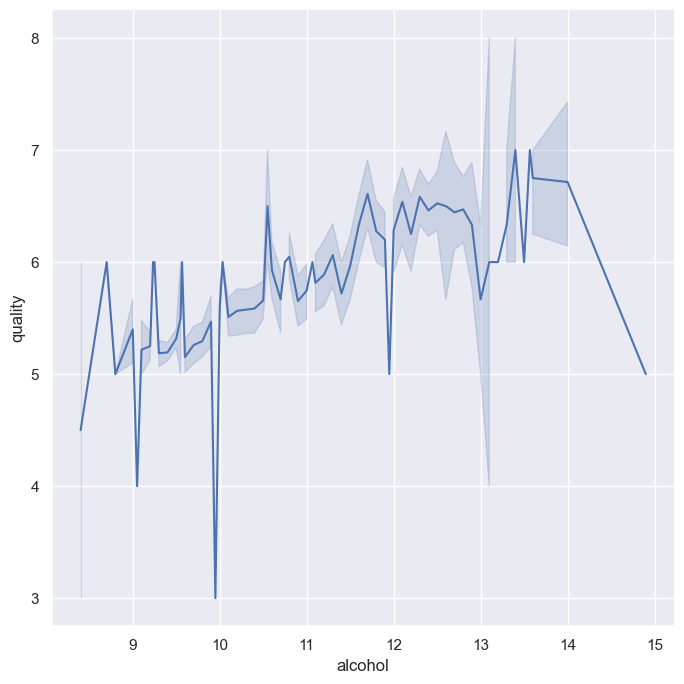

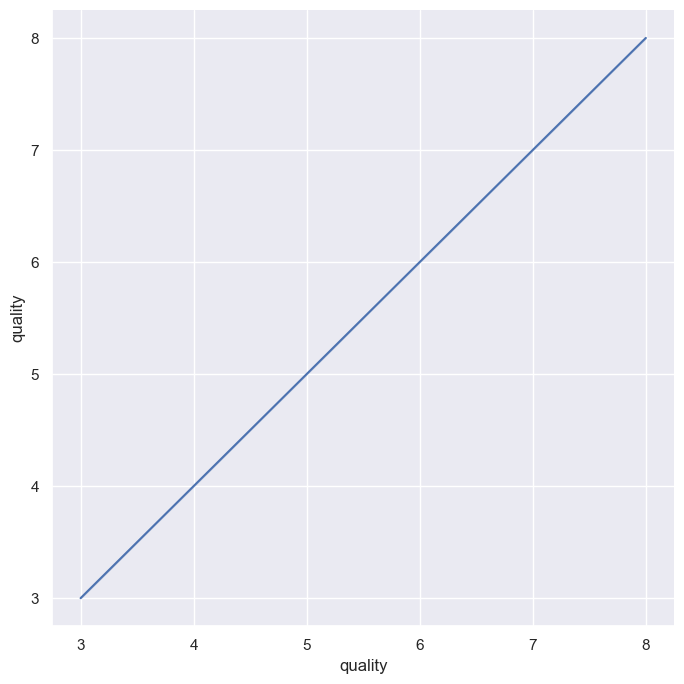

In [14]:
# Pour chacun des attributs, affichez les diagrammes de Y en fonction de cet attribut
attributs = df.columns.values
for attribut in attributs:
    sns.set()
    sns.relplot(data=df,x=df[attribut],y='quality', kind='line',height=7,aspect=1)
    

Y'en a-t-il parmi les 11 courbes qui presentent un certain degre de correlation (negative ou positive) avec la variable cible Y(qualite) ? Lesquelles ? 

Double-cliquez sur ce texte pour editer votre reponse et appuyer sur le bouton "Run".


### Creation du modèle

In [15]:
# Importez les librairies neccessaires pour l'entrainement du modèle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [16]:
# Completer les lignes de code ci-dessous (...)
# Scindez les donnes en 2 ensembles, dont 80% pour l'entrainement et 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=100, random_state=4)

# Selectionnez l'algorithme LinearRegression
lr = LinearRegression()

# Learn the digits on the train subset
lr.fit(X_train, y_train)

# Predict the value of the digit on the test subset
y_pred = lr.predict(X_test)
# print(y_pred)

In [17]:
# Affichez les coefficients W du modele
# Rappel de l'equation d'un modele de Regression lineaire: f(x) = w0 + w1*x1 + w2*x2 + ... + w11*x11
print("Valeurs des coefficients [w1,w2,...,w11]", lr.coef_)
print("Valeur de w0", lr.intercept_)

Valeurs des coefficients [w1,w2,...,w11] [[ 4.83665736e-02 -1.07161961e+00 -1.85998469e-01  1.65205418e-02
  -1.81758327e+00  5.41096935e-03 -3.22738597e-03 -2.97972234e+01
  -2.74816305e-01  9.32526722e-01  2.68459221e-01]]
Valeur de w0 [33.23535135]


# Evaluer les métriques de regression

In [18]:
# Calculez l'exactitude du modele en utilisant le sous ensemble de test
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
accuracy = lr.score(X_test, y_test)
print(accuracy)

0.2609364569310232


In [19]:
# Calculez la moyenne quadratique entre les valeurs réelles du sous ensemble de test et les predictions de notre modele 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
rmse_linear = mean_squared_error(y_test,y_pred)
print(rmse_linear)

0.4481681325170275



# Créer un modèle de classification

### Pour cela, vous devez remplacer ou convertir la colonne 'quality' en une variable binaire qui peut prendre 2 valeurs seulement: 0 si le vin est de mauvaise qualité (i.e qualité actuelle entre 0 et 5) ou 1 si le vin est de bonne qualité (i.e qualité actuelle entre 6 et 10)


In [20]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [21]:
# Calculer et affichez les proportions de vins de bonne et de mauvaise qualité avec la fonction value_counts()
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html
# See proportion of good vs bad wines
df['goodquality'].value_counts()

0    1382
1     217
Name: goodquality, dtype: int64

In [22]:
# Selectionnez les vins de bonne qualité
# Completez le code ci-dessous
#df_bonne_q = df[...==1]
#df_bonne_q.describe()
df_bonne_q = df[df['goodquality']==1]
df_bonne_q.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count     217.000000        217.000000   217.000000      217.000000   
mean        8.847005          0.405530     0.376498        2.708756   
std         1.999977          0.144963     0.194438        1.363026   
min         4.900000          0.120000     0.000000        1.200000   
25%         7.400000          0.300000     0.300000        2.000000   
50%         8.700000          0.370000     0.400000        2.300000   
75%        10.100000          0.490000     0.490000        2.700000   
max        15.600000          0.915000     0.760000        8.900000   

        chlorides  free sulfur dioxide  total sulfur dioxide     density  \
count  217.000000           217.000000            217.000000  217.000000   
mean     0.075912            13.981567             34.889401    0.996030   
std      0.028480            10.234615             32.572238    0.002201   
min      0.012000             3.000000              7.000000    0.990640   
25%      0.062000             6.000000             17.000000    0.994700   
50%      0.073000            11.000000             27.000000    0.995720   
75%      0.085000            18.000000             43.000000    0.997350   
max      0.358000            54.000000            289.000000    1.003200   

               pH   sulphates     alcohol     quality  goodquality  
count  217.000000  217.000000  217.000000  217.000000        217.0  
mean     3.288802    0.743456   11.518049    7.082949          1.0  
std      0.154478    0.134038    0.998153    0.276443          0.0  
min      2.880000    0.390000    9.200000    7.000000          1.0  
25%      3.200000    0.650000   10.800000    7.000000          1.0  
50%      3.270000    0.740000   11.600000    7.000000          1.0  
75%      3.380000    0.820000   12.200000    7.000000          1.0  
max      3.780000    1.360000   14.000000    8.000000          1.0

In [23]:
# Selectionnez les vins de mauvaise qualité
# Completez le code ci-dessous
# df_mauvaise_q = ...
# df_mauvaise_q.describe()
df_mauvaise_q = df[df['goodquality']==0]
df_mauvaise_q.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1382.000000       1382.000000  1382.000000     1382.000000   
mean        8.236831          0.547022     0.254407        2.512120   
std         1.682726          0.176337     0.189665        1.415778   
min         4.600000          0.160000     0.000000        0.900000   
25%         7.100000          0.420000     0.082500        1.900000   
50%         7.800000          0.540000     0.240000        2.200000   
75%         9.100000          0.650000     0.400000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1382.000000          1382.000000           1382.000000  1382.000000   
mean      0.089281            16.172214             48.285818     0.996859   
std       0.049113            10.467685             32.585604     0.001808   
min       0.034000             1.000000              6.000000     0.990070   
25%       0.071000             8.000000             23.000000     0.995785   
50%       0.080000            14.000000             39.500000     0.996800   
75%       0.091000            22.000000             65.000000     0.997900   
max       0.611000            72.000000            165.000000     1.003690   

                pH    sulphates      alcohol      quality  goodquality  
count  1382.000000  1382.000000  1382.000000  1382.000000       1382.0  
mean      3.314616     0.644754    10.251037     5.408828          0.0  
std       0.154135     0.170629     0.969664     0.601719          0.0  
min       2.740000     0.330000     8.400000     3.000000          0.0  
25%       3.210000     0.540000     9.500000     5.000000          0.0  
50%       3.310000     0.600000    10.000000     5.000000          0.0  
75%       3.410000     0.700000    10.900000     6.000000          0.0  
max       4.010000     2.000000    14.900000     6.000000          0.0

### Normalisez les attributs: imaginez ensemble de données avec deux attributs, la taille en millimètres et le poids en kilogrammes, alors les valeurs numériques de la taille seront beaucoup plus élevées que celle du poids. Étant donné que l'algorithme de 'machine learning' n'utilise que les valeurs sans considerer leur unité de mesure, une plus grande importance sera automatiquement accordée à la taille qu'au poids, créant ainsi un biais.

In [24]:
from sklearn.preprocessing import StandardScaler
X_attributs = X
X = StandardScaler().fit_transform(X)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# Selectionnez l'algorithme de classification LogisticRegression

logist =LogisticRegression()
# Entrainez le modele
logist.fit(X_train, y_train)
# Prediction de la qualite de l'ensemble de test
y_pred_logist = logist.predict(X_test)
print(classification_report(y_test, y_pred_logist))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.60      0.75      0.67        40
           6       0.62      0.67      0.65        46
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         1

    accuracy                           0.61       100
   macro avg       0.20      0.24      0.22       100
weighted avg       0.53      0.61      0.56       100



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Selectionnez l'algorithme de classification DecisionTreeClassifier
logist = DecisionTreeClassifier(random_state=1)
# Entrainez le modele
logist.fit(X_train, y_train)
# Prediction de la qualite de l'ensemble de test
y_pred_logist = logist.predict(X_test)
print(classification_report(y_test, y_pred_logist))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.40      0.57         5
           5       0.71      0.75      0.73        40
           6       0.73      0.59      0.65        46
           7       0.20      0.43      0.27         7
           8       0.50      1.00      0.67         1

    accuracy                           0.63       100
   macro avg       0.52      0.53      0.48       100
weighted avg       0.69      0.63      0.65       100



<AxesSubplot:>

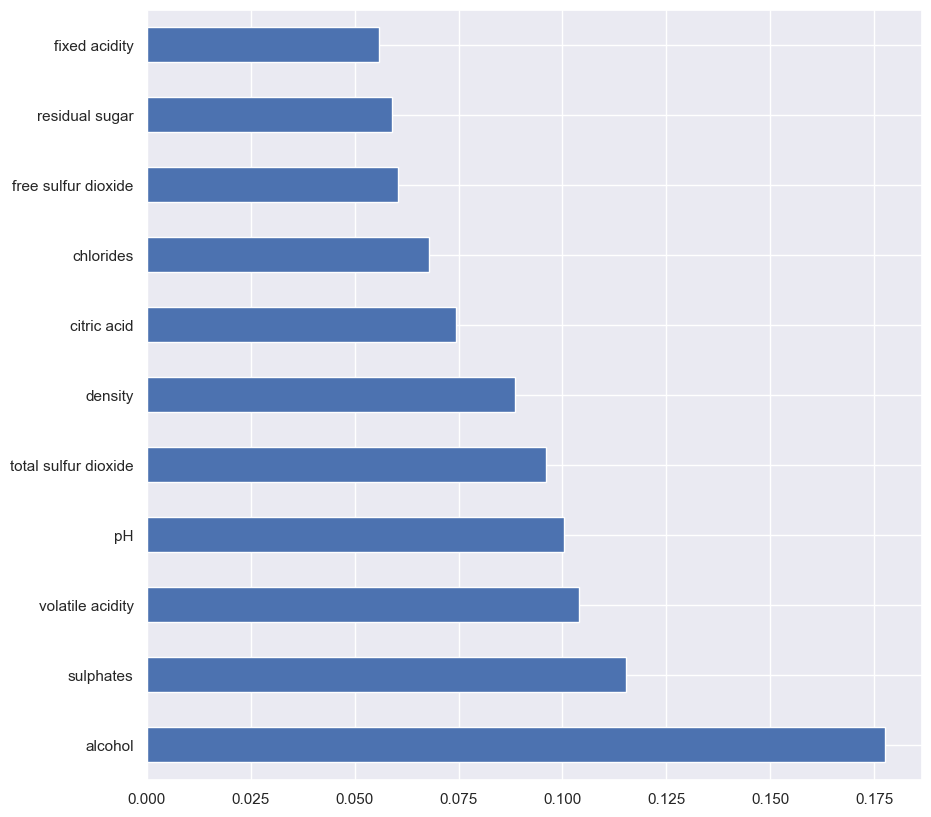

In [27]:
# Affichez les attributs qui ont plus d'influence sur la qualité du vin selon DecisionTreeClassifier
attributs_importances = pd.Series(logist.feature_importances_, index=X_attributs.columns)
attributs_importances.nlargest(25).plot(kind='barh',figsize=(10,10))


# Créer d'autres modèles de classification

### Nous allons entrainer deux autres modeles en utilisant des algorithmes de types differents pour comparer leur performance


In [28]:
from sklearn.tree import DecisionTreeClassifier
# Selectionnez l'algorithme de classification DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)

# Entrainez le modele
dtree.fit(X_train, y_train)

# Prediction de la qualite de l'ensemble de test
y_pred_dtree = dtree.predict(X_test)
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.40      0.57         5
           5       0.71      0.75      0.73        40
           6       0.73      0.59      0.65        46
           7       0.20      0.43      0.27         7
           8       0.50      1.00      0.67         1

    accuracy                           0.63       100
   macro avg       0.52      0.53      0.48       100
weighted avg       0.69      0.63      0.65       100



<AxesSubplot:>

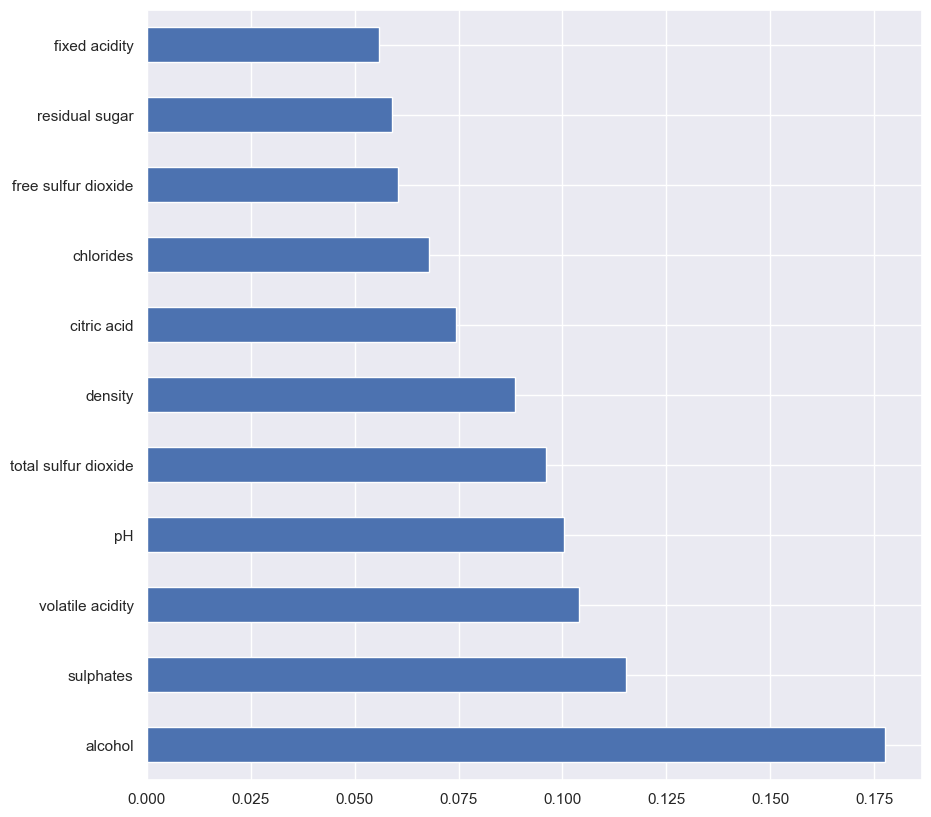

In [29]:
# Affichez les attributs qui ont plus d'influence sur la qualité du vin selon DecisionTreeClassifier
attributs_importances = pd.Series(dtree.feature_importances_, index=X_attributs.columns)
attributs_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Selectionnez l'algorithme de classification RandomForestClassifier
rforest = RandomForestClassifier(random_state=1)
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
print(classification_report(y_test, y_pred_rforest))

C:\Users\HP\AppData\Local\Temp\ipykernel_15856\2858572679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.67      0.82      0.74        40
           6       0.79      0.59      0.68        46
           7       0.40      0.86      0.55         7
           8       1.00      1.00      1.00         1

    accuracy                           0.67       100
   macro avg       0.48      0.54      0.49       100
weighted avg       0.67      0.67      0.66       100



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:>

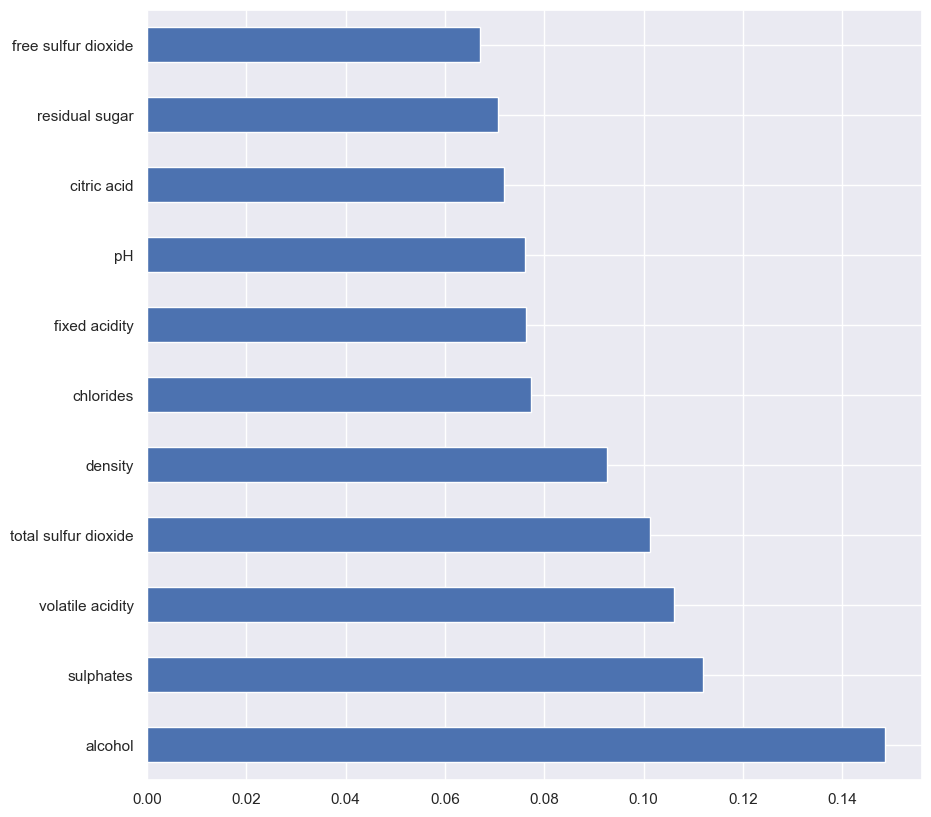

In [31]:
attributs_importances = pd.Series(rforest.feature_importances_, index=X_attributs.columns)
attributs_importances.nlargest(25).plot(kind='barh',figsize=(10,10))